# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   **What methods are best for identifying outliers?**
    * Using the boxplot, we can see the distribution of the different features we have and locate them in their corresponding quartile. 
    * We can generate statistical measures like the mean and Median for the features in our dataframe<br><br>
     

*   **How do you make the decision to keep or exclude outliers from any future models?**<br>
    We have three alternatives to dealing with outliers, but the one you choose really depends on the goal of your project and the models you intend to use:

    - The first one is to **Leave them** as they are, some models like decision trees are not affected by them so you can just ignore them, or in the case that you are just doing a EDA and nothing else with that specific dataset.

    - The Second option is to **Reasign them**, you can transform them into the last acceptable value, change them into a new category or bin them to make them useful for your model (This is the most likely path to take if you are planning to use the dataset for modeling or ML).

    - The last optin is to **Delete them**.  You only do that when you are confident that the outliers are a mistake, a typo in the dataset, or they represent less than 5% of the information in the whole dataset (it is really rare to do this).


### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
# Import packages for data manipulation
import pandas as pd                   # data science essentials
import numpy as np                    # mathematical essentials

# Import packages for data visualization
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
### YOUR CODE HERE ###
data.head(n= 5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
### YOUR CODE HERE ###
data.size

232584

In [5]:
# Get the shape of the data
### YOUR CODE HERE ###
data.shape


(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


**For distribution**, it is a good idea to consider : Boxplots and Histograms

These types of visualizations help us understand how the datapoints conform our dataset, and they an early way to understand which models are going to be more appropriate for our dataset.


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

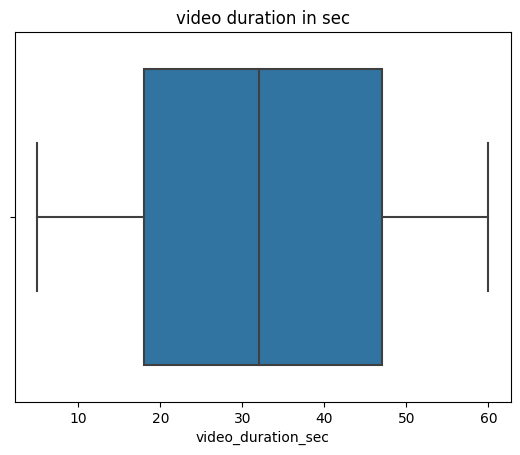

In [8]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
plt.title('video duration in sec')
sns.boxplot(x= data['video_duration_sec']);

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

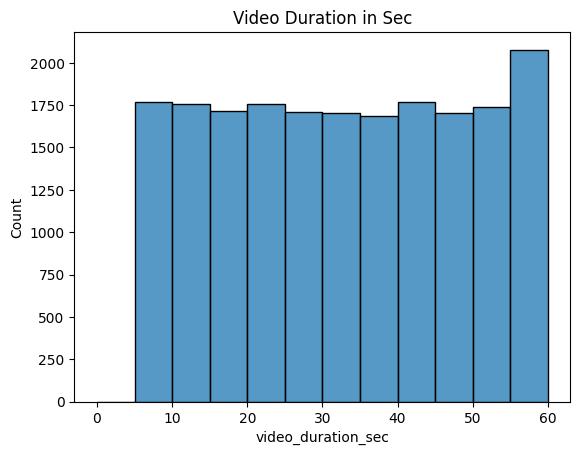

In [29]:
# Create a histogram
### YOUR CODE HERE ###
plt.title('Video Duration in Sec')
sns.histplot(x= data["video_duration_sec"], bins= range(0,61,5));

**Question:** What do you notice about the duration and distribution of the videos?

* All the videos have a duration range between 5 to 60 seconds and it is mostly distributed in a uniform way

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

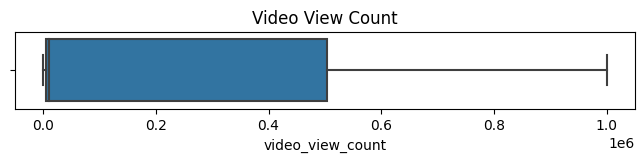

In [10]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize= (8,1))
sns.boxplot(x= data["video_view_count"])
plt.title("Video View Count");


Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

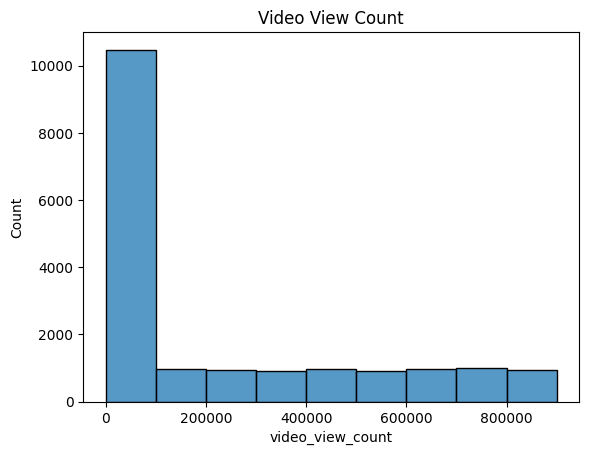

In [33]:
# Create a histogram
### YOUR CODE HERE ###

sns.histplot (x= data["video_view_count"],bins=range(0,(10**6),10**5)) #counts of 100k
plt.title("Video View Count");

**Question:** What do you notice about the distribution of this variable?

* The majority of videos have a view count less than 100,000 views. It is not a uniform distribution

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

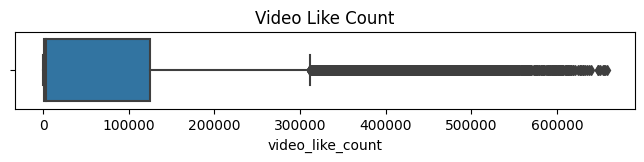

In [12]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
plt.figure(figsize=(8,1))
sns.boxplot(x= data['video_like_count'])
plt.title('Video Like Count');


Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

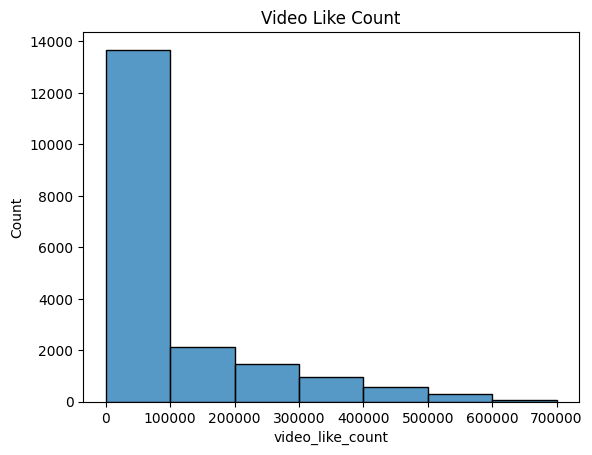

In [13]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x=data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
plt.title('Video Like Count');

**Question:** What do you notice about the distribution of this variable?

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

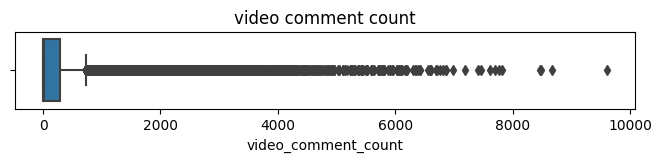

In [14]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
plt.figure(figsize= (8,1))
sns.boxplot(x= data['video_comment_count'])
plt.title('video comment count');


Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

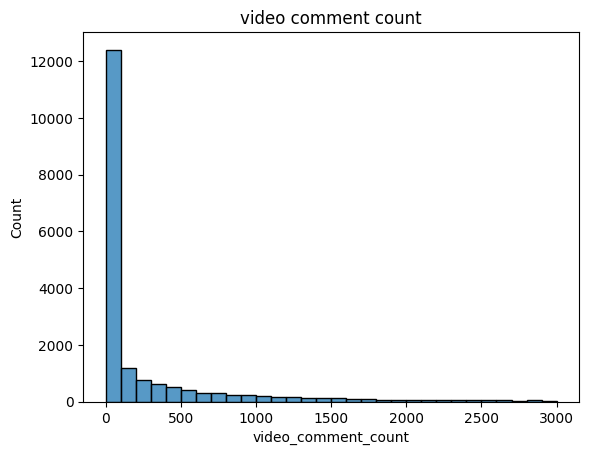

In [15]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x= data['video_comment_count'],bins=range(0,(3001),100))
plt.title('video comment count');

**Question:** What do you notice about the distribution of this variable?

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

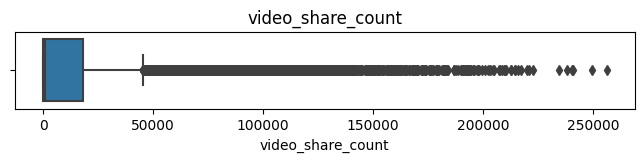

In [16]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###
plt.figure(figsize=(8,1))
sns.boxplot(x= data['video_share_count'])
plt.title('video_share_count');

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

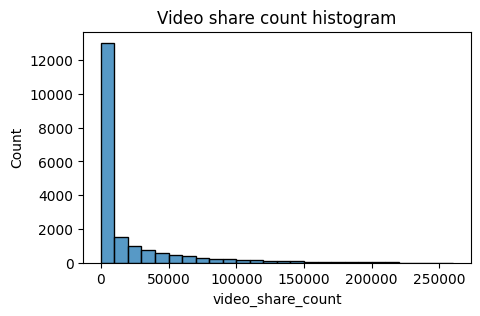

In [17]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(27*10000),10*1000))
plt.title('Video share count histogram');



**Question:** What do you notice about the distribution of this variable?

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

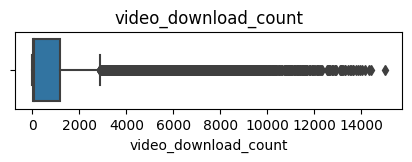

In [18]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x= data['video_download_count']);

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

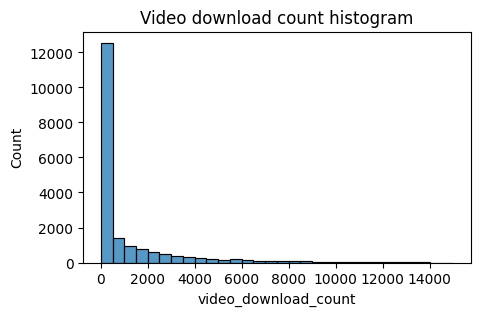

In [19]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize= (5,3))
sns.histplot(data['video_download_count'], bins= range(0,(15*1000+1),500))
plt.title('Video download count histogram');

**Question:** What do you notice about the distribution of this variable?

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

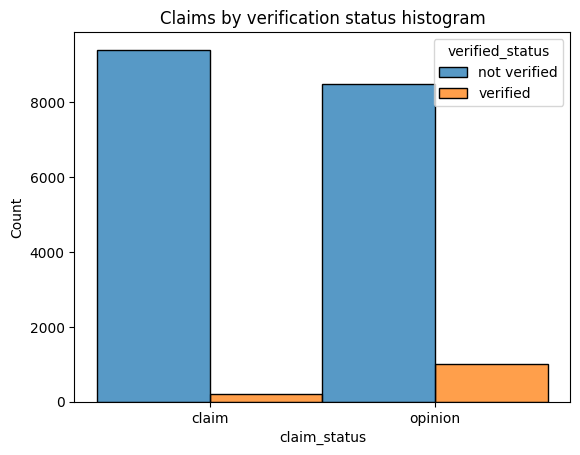

In [20]:
# Create a histogram
### YOUR CODE HERE ###
#plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',        #Divide columbs by status
             multiple='dodge',             #Separate columbs by status
            )
plt.title('Claims by verification status histogram');

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

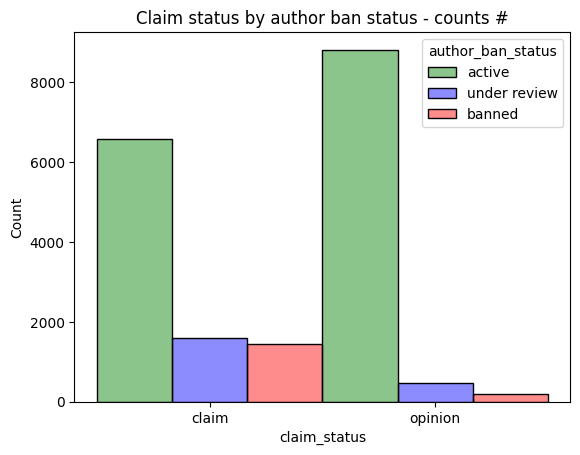

In [21]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(data, x='claim_status',
             hue='author_ban_status', multiple='dodge',
             hue_order=['active', 'under review', 'banned'],  #Organization
             palette={'active':'green', 'under review':'blue', 'banned':'red'},
             alpha=0.45                        #althers intensity of the color
            )
plt.title('Claim status by author ban status - counts #');

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

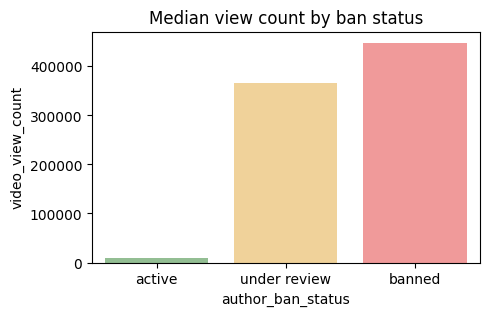

In [22]:
# Create a bar plot

# New dataframe with the counts of each status
ban_counts_status = data.groupby(['author_ban_status']).median(numeric_only= True).reset_index()

#Ploting the figure
fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_counts_status,          #New df as source
            x='author_ban_status',           
            y='video_view_count',
            order=['active', 'under review', 'banned'], 
            palette={'active':'green', 'under review':'orange', 'banned':'red'}, # dictionary with colors to use 
            alpha=0.45)
plt.title('Median view count by ban status');

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

In [23]:
# Calculate the median view count for claim status.
data.groupby('claim_status')['video_view_count'].median()


claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

In [24]:
### YOUR CODE HERE ###

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

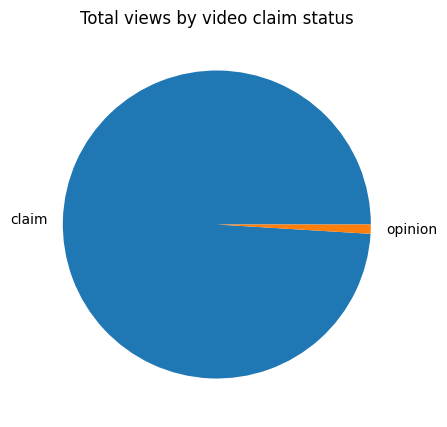

In [25]:
# Create a pie graph
#sum total of views by status
pie_info = data.groupby('claim_status')['video_view_count'].sum()

fig = plt.figure(figsize=(5,5))
plt.pie(pie_info, labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

**Question:** What do you notice about the overall view count for claim status?

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [26]:
### YOUR CODE HERE ###
col_names = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in col_names:
    Q1 = data[column].quantile(0.25)   #get 25%
    Q3 = data[column].quantile(0.75)   #get 75%
    iqr = Q3 - Q1                      #Interquartile Range
    median = data[column].median()     #Median Value     
    outlier_threshold = median + 1.5*iqr  #Statistical Outlier**
    
    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

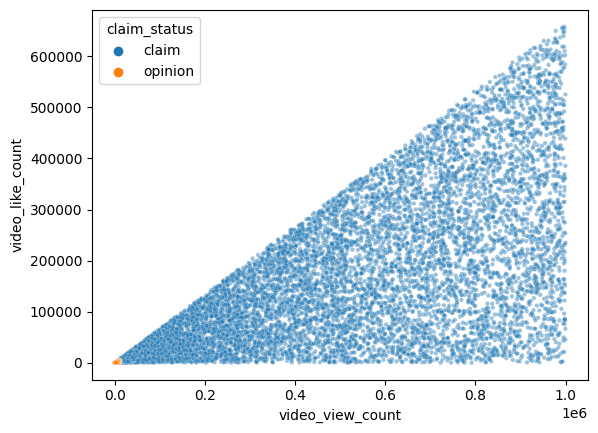

In [27]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` according to 'claim_status'
### YOUR CODE HERE ###
sns.scatterplot(x=data["video_view_count"], 
                y=data["video_like_count"],
                hue=data["claim_status"], 
                s=10, 
                alpha=.45)
plt.show()

In [28]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` for opinions only
### YOUR CODE HERE ###



You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


==> ENTER YOUR RESPONSE HERE

I have learned ....

My other questions are ....

My client would likely want to know ...



### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

==> ENTER YOUR RESPONSES HERE

Visualizations helped me understand ..

==> ENTER YOUR RESPONSES HERE


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.